In [155]:
import pandas as pd

df=pd.read_csv("time.csv",parse_dates=['date'],index_col='date').asfreq("D")
df

,orders,temperature,media_spend
date,,,
2020-05-02,54,18.270322,0.0
2020-05-03,63,19.882444,0.0
2020-05-04,56,16.878095,0.0
2020-05-05,65,21.878648,0.0
2020-05-06,64,21.112398,0.0
...,...,...,...
2022-06-26,89,12.669216,0.0
2022-06-27,77,9.819516,0.0
2022-06-28,97,18.834372,0.0


In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,790.0,89.056962,200.765633,40.000000,67.250000,78.000000,86.000000,4080.00000
temperature,769.0,17.356958,9.881137,-9.979354,11.003947,18.294586,24.021989,37.94526
media_spend,790.0,0.502559,2.673492,0.000000,0.000000,0.000000,0.000000,14.99067


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790 entries, 2020-05-02 to 2022-06-30
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   orders       790 non-null    int64  
 1   temperature  769 non-null    float64
 2   media_spend  790 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 24.7 KB


In [158]:
df.isnull().sum()

orders          0
temperature    21
media_spend     0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790 entries, 2020-05-02 to 2022-06-30
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   orders       790 non-null    int64  
 1   temperature  769 non-null    float64
 2   media_spend  790 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 24.7 KB


# handling outliers

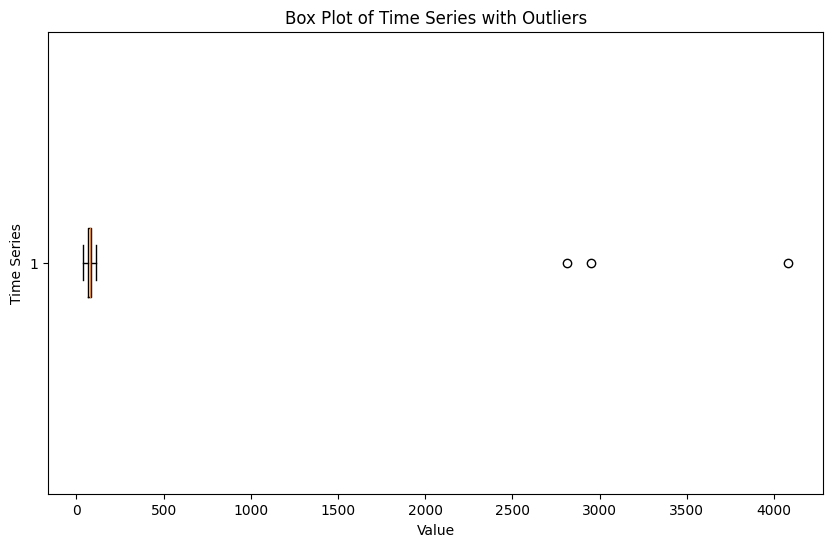

In [160]:
target_series = df['orders']

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(target_series, vert=False)
plt.title('Box Plot of Time Series with Outliers')
plt.xlabel('Value')
plt.ylabel('Time Series')
plt.show()

In [161]:
# Assuming your target column is named 'target_column'
target_series = df['orders']

# Define the threshold for outlier removal
outlier_threshold = 2500

# Remove outliers based on the defined threshold
cleaned_target_series = target_series[target_series <= outlier_threshold]

# Print the number of removed outliers
num_removed_outliers = len(target_series) - len(cleaned_target_series)
print("Number of removed outliers:", num_removed_outliers)

# Save the cleaned time series to a new DataFrame or overwrite the original if desired

df['orders'] = cleaned_target_series  # Replace the target column with the cleaned values


Number of removed outliers: 3


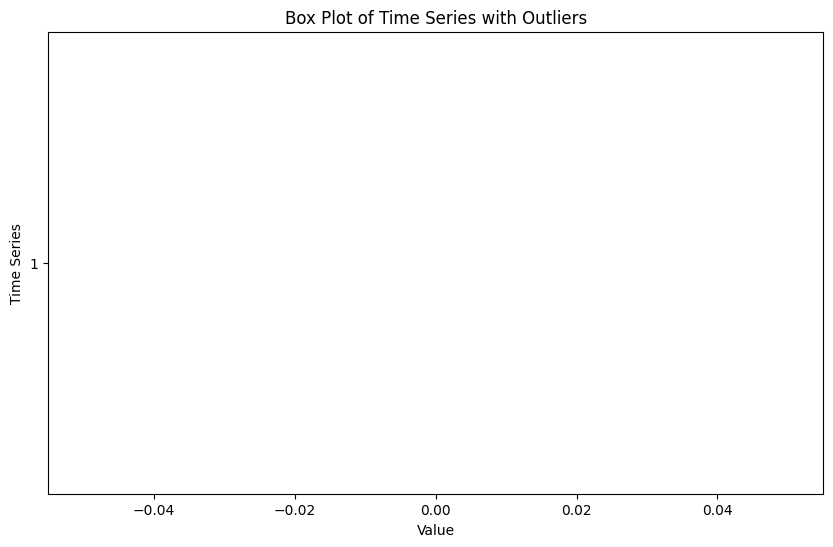

In [162]:
target_series = df['orders']

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(target_series, vert=False)
plt.title('Box Plot of Time Series with Outliers')
plt.xlabel('Value')
plt.ylabel('Time Series')
plt.show()

# filling missing values

In [8]:
# df.loc[:,['temperature']] = df['temperature'].fillna(method='ffill')

In [163]:
df.isnull().sum()

orders          3
temperature    21
media_spend     0
dtype: int64

In [164]:
columns_to_interpolate = ['temperature']

# Apply linear interpolation to the specified columns
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear')

# Print the DataFrame with filled missing values
print(df)

            orders  temperature  media_spend
date                                        
2020-05-02    54.0    18.270322          0.0
2020-05-03    63.0    19.882444          0.0
2020-05-04    56.0    16.878095          0.0
2020-05-05    65.0    21.878648          0.0
2020-05-06    64.0    21.112398          0.0
...            ...          ...          ...
2022-06-26    89.0    12.669216          0.0
2022-06-27    77.0     9.819516          0.0
2022-06-28    97.0    18.834372          0.0
2022-06-29    80.0    15.408380          0.0
2022-06-30    79.0    11.982388          0.0

[790 rows x 3 columns]


In [165]:
columns_to_interpolate = ['orders']

# Apply linear interpolation to the specified columns
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear')

# Print the DataFrame with filled missing values
print(df)

            orders  temperature  media_spend
date                                        
2020-05-02    54.0    18.270322          0.0
2020-05-03    63.0    19.882444          0.0
2020-05-04    56.0    16.878095          0.0
2020-05-05    65.0    21.878648          0.0
2020-05-06    64.0    21.112398          0.0
...            ...          ...          ...
2022-06-26    89.0    12.669216          0.0
2022-06-27    77.0     9.819516          0.0
2022-06-28    97.0    18.834372          0.0
2022-06-29    80.0    15.408380          0.0
2022-06-30    79.0    11.982388          0.0

[790 rows x 3 columns]


In [166]:
df.isnull().sum()

orders         0
temperature    0
media_spend    0
dtype: int64

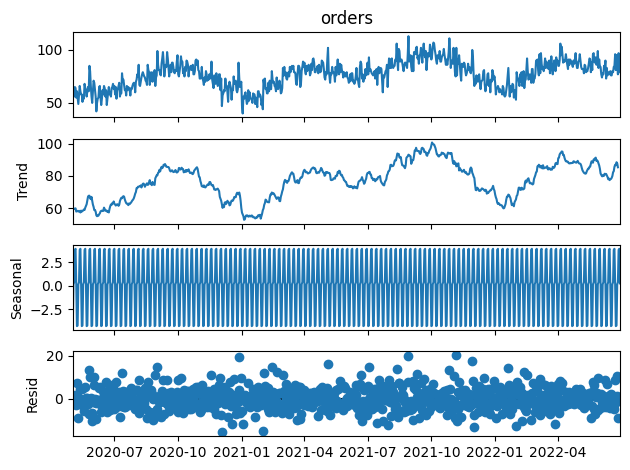

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with datetime index
decomposition = seasonal_decompose(df['orders'], model='add',period=7)
decomposition.plot()
plt.show()

# adfuller test for all columns

In [142]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'ts' is your time series data (a pandas Series or DataFrame)
result = adfuller(df["temperature"])

# Extracting the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("p-value is less than or equal to 0.05. The data is likely stationary.")
else:
    print("p-value is greater than 0.05. The data is likely non-stationary.")


ADF Test Statistic: -2.488814159330504
p-value: 0.11821973694468002
p-value is greater than 0.05. The data is likely non-stationary.


In [143]:


# Assuming 'ts' is your time series data (a pandas Series or DataFrame)
result = adfuller(df["orders"])

# Extracting the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("p-value is less than or equal to 0.05. The data is likely stationary.")
else:
    print("p-value is greater than 0.05. The data is likely non-stationary.")

ADF Test Statistic: -2.48707628941036
p-value: 0.11865055231882804
p-value is greater than 0.05. The data is likely non-stationary.


In [144]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'ts' is your time series data (a pandas Series or DataFrame)
result = adfuller(df["media_spend"])

# Extracting the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("p-value is less than or equal to 0.05. The data is likely stationary.")
else:
    print("p-value is greater than 0.05. The data is likely non-stationary.")

ADF Test Statistic: -29.065619940110192
p-value: 0.0
p-value is less than or equal to 0.05. The data is likely stationary.


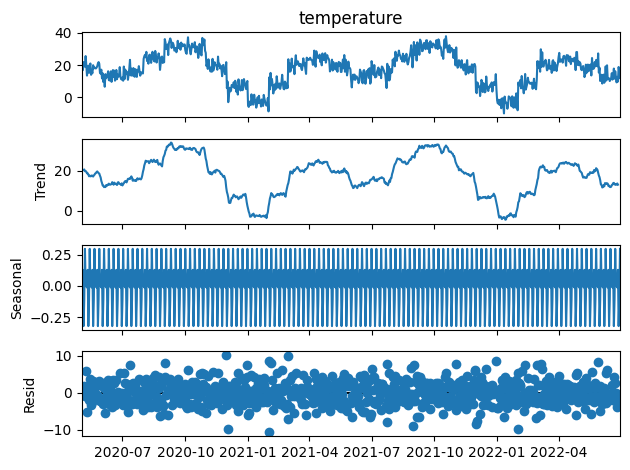

In [145]:

# Assuming 'df' is your DataFrame with datetime index
decomposition = seasonal_decompose(df['temperature'], model='add',period=7)
decomposition.plot()
plt.show()

# making temperature column stationary

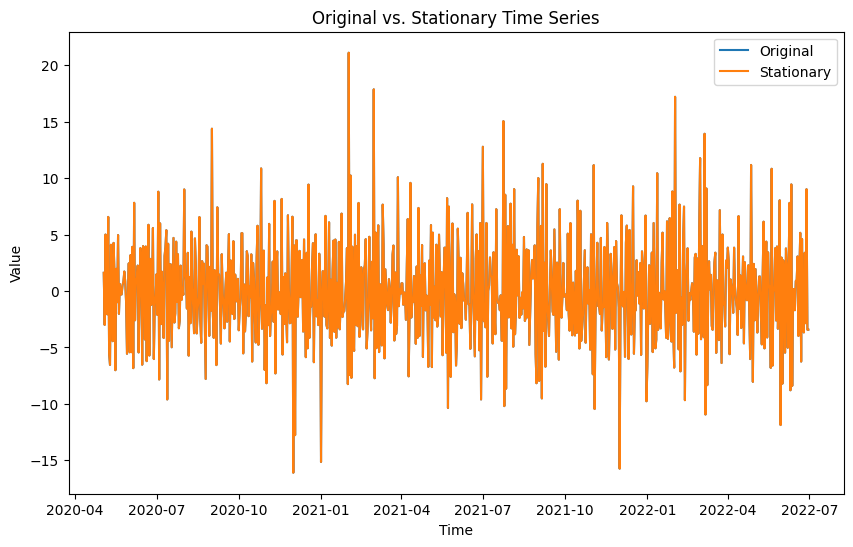

In [146]:


# Assuming your non-stationary column is named 'column_name'
# Perform first-order differencing to make the series stationary
df["temperature"] = df['temperature'].diff().dropna()

# Plot the original and stationary series
plt.figure(figsize=(10, 6))
plt.plot(df['temperature'], label='Original')
plt.plot(df['temperature'], label='Stationary')
plt.legend()
plt.title('Original vs. Stationary Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [147]:
df=df.dropna()
df

,orders,temperature,media_spend
date,,,
2020-05-03,63.0,1.612122,0.0
2020-05-04,56.0,-3.004349,0.0
2020-05-05,65.0,5.000553,0.0
2020-05-06,64.0,-0.766250,0.0
2020-05-07,55.0,-2.067746,0.0
...,...,...,...
2022-06-26,89.0,3.384897,0.0
2022-06-27,77.0,-2.849700,0.0
2022-06-28,97.0,9.014856,0.0


In [148]:
# Assuming 'ts' is your time series data (a pandas Series or DataFrame)
result = adfuller(df["temperature"])

# Extracting the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("p-value is less than or equal to 0.05. The data is likely stationary.")
else:
    print("p-value is greater than 0.05. The data is likely non-stationary.")

ADF Test Statistic: -20.452489962388068
p-value: 0.0
p-value is less than or equal to 0.05. The data is likely stationary.


# making target column stationary

<ipython-input-105-c19c2ae39553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["orders"] = df['orders'].diff().dropna()


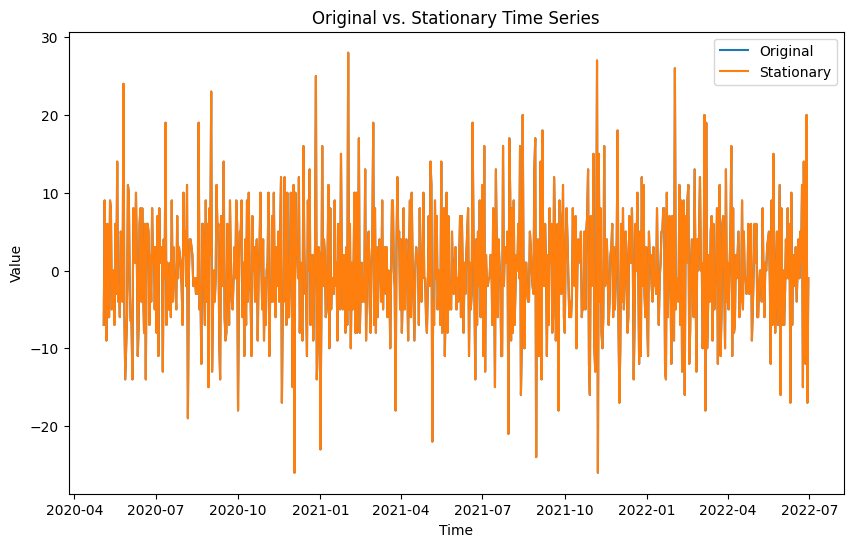

In [105]:

# # Assuming your non-stationary column is named 'column_name'
# # Perform first-order differencing to make the series stationary
# df["orders"] = df['orders'].diff().dropna()

# # Plot the original and stationary series
# plt.figure(figsize=(10, 6))
# plt.plot(df['orders'], label='Original')
# plt.plot(df['orders'], label='Stationary')
# plt.legend()
# plt.title('Original vs. Stationary Time Series')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.show()

In [106]:
# df=df.dropna()

In [107]:
# # Assuming 'ts' is your time series data (a pandas Series or DataFrame)
# result = adfuller(df["orders"])

# # Extracting the test statistics and p-value
# test_statistic = result[0]
# p_value = result[1]

# # Print the results
# print("ADF Test Statistic:", test_statistic)
# print("p-value:", p_value)

# # Interpret the results
# if p_value <= 0.05:
#     print("p-value is less than or equal to 0.05. The data is likely stationary.")
# else:
#     print("p-value is greater than 0.05. The data is likely non-stationary.")

ADF Test Statistic: -9.09081860140282
p-value: 3.828702107510868e-15
p-value is less than or equal to 0.05. The data is likely stationary.


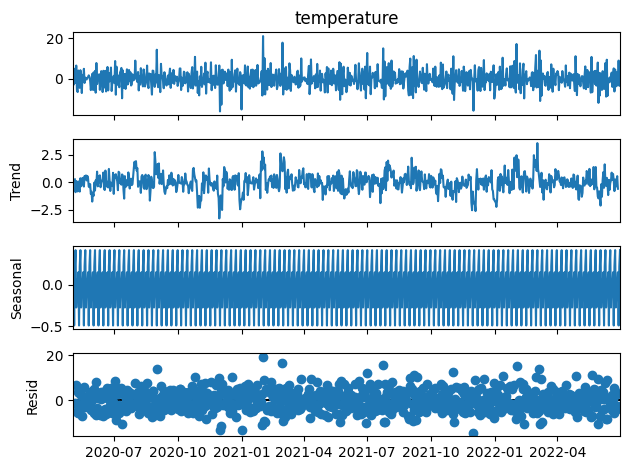

In [74]:
decomposition = seasonal_decompose(df['temperature'], model='add',period=7)
decomposition.plot()
plt.show()

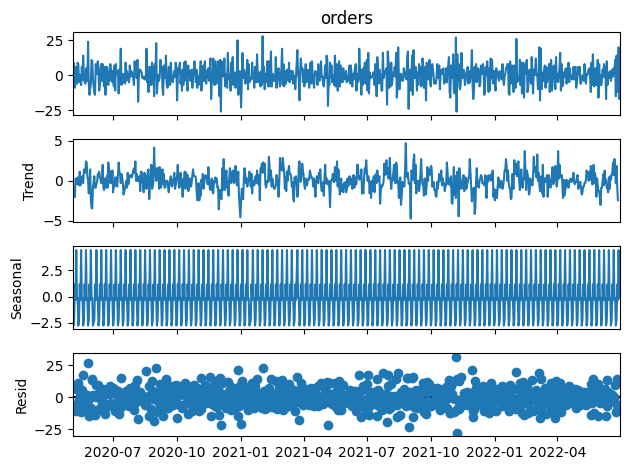

In [21]:
decomposition = seasonal_decompose(df['orders'], model='add',period=7)
decomposition.plot()
plt.show()

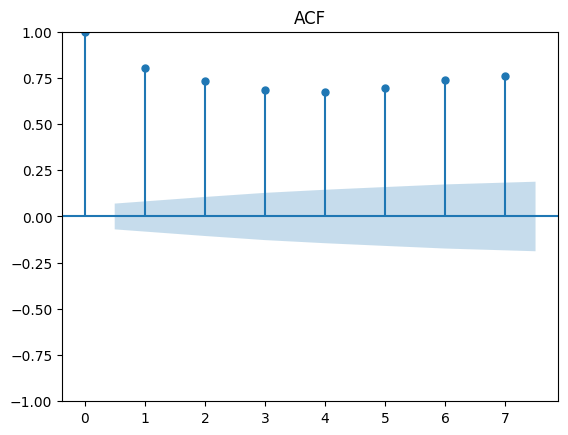

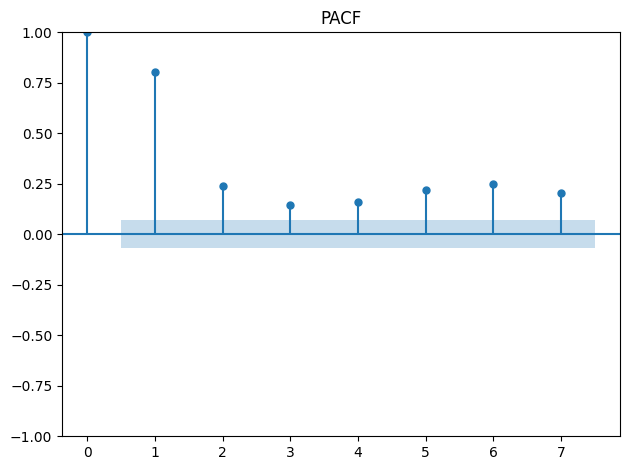

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF plot

plot_acf(df['orders'], lags=7, title='ACF')

# PACF plot

plot_pacf(df['orders'], lags=7, title='PACF')

plt.tight_layout()
plt.show()

# sarimax

# seasonality

In [24]:
# df_diff = df.diff(7).dropna()

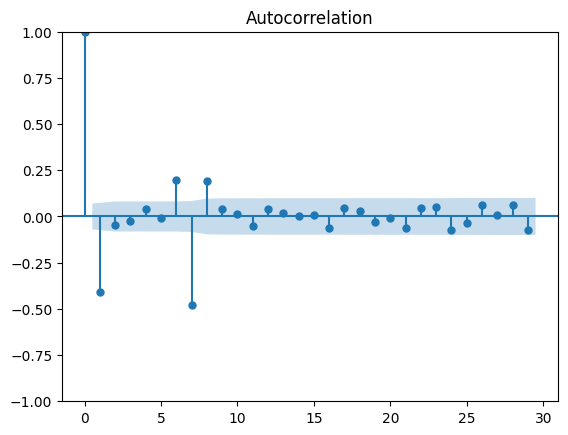

In [25]:
# fig1 = plot_acf(df_diff["orders"])

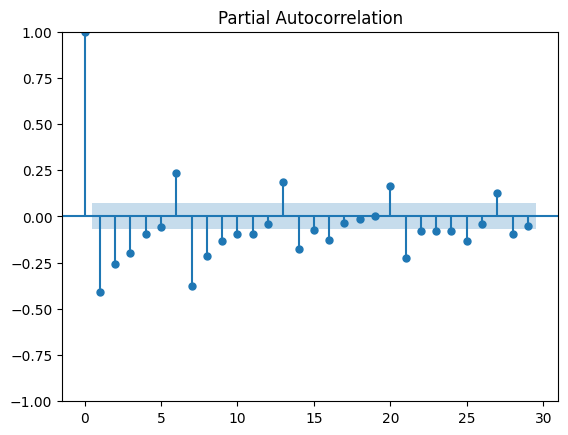

In [26]:
# fig2 = plot_pacf(df_diff["orders"])

In [168]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product
import math

# Assuming your target column is named 'orders'
target_series = df['orders']

# Exogenous variables
exog_variables = df[['temperature', 'media_spend']]  # Adjust as needed

# Split the df into training and test sets (90% train, 10% test)
test_size = math.ceil(len(df) * 0.10)
train_series = target_series[:-test_size]
test_series = target_series[-test_size:]
exog_train = exog_variables[:-test_size]
exog_test = exog_variables[-test_size:]

# Define the range of values to search for p, d, q, P, D, Q
p_values = range(0, 3)  # You can adjust the range
d_values = range(0, 3)  # You can adjust the range
q_values = range(0, 3)  # You can adjust the range
P_values = range(0, 3)  # You can adjust the range
D_values = range(0, 2)  # You can adjust the range
Q_values = range(0, 3)  # You can adjust the range
S_values = [7]  # Weekly seasonality

# Initialize variables for best configuration and lowest RMSE
best_rmse = float('inf')
best_config = None

# Perform grid search
for p, d, q, P, D, Q in product(p_values, d_values, q_values, P_values, D_values, Q_values):
    order = (p, d, q)
    seasonal_order = (P, D, Q, 7)  # S=7 for weekly seasonality

    # Fit the SARIMAX model on the training data
    model = SARIMAX(train_series, exog=exog_train, order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Forecast using the fitted model on the test data
    forecast_steps = len(test_series)
    forecast = results.get_forecast(steps=forecast_steps, exog=exog_test)

    # Calculate RMSE on the test set
    rmse = sqrt(mean_squared_error(test_series, forecast.predicted_mean))

    # Update best configuration if RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_config = (p, d, q, P, D, Q)

print("Best RMSE:", best_rmse)
print("Best Configuration (p, d, q, P, D, Q):", best_config)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best RMSE: 3.3723573095076227
Best Configuration (p, d, q, P, D, Q): (0, 2, 2, 2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 2.5162839964015764
RMSE: 3.3723573095076227
MAPE: 2.925645447063673


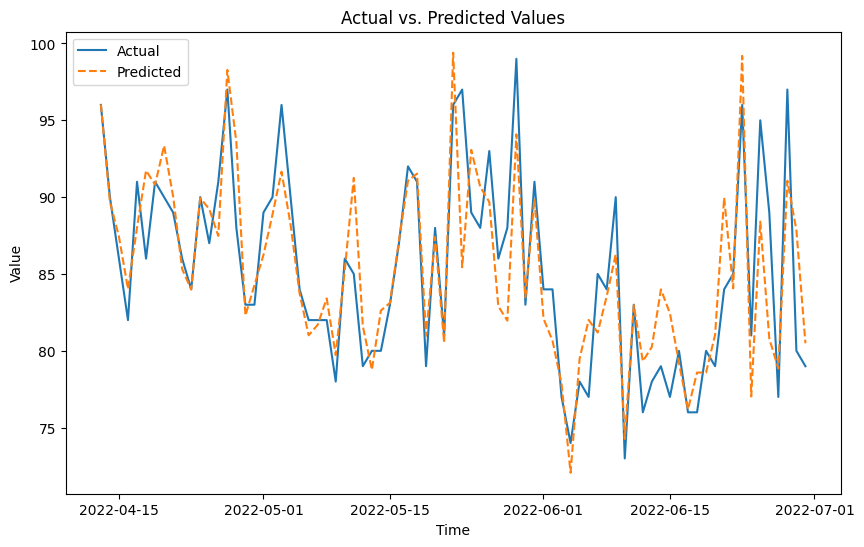

In [169]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import math
import matplotlib.pyplot as plt

# Assuming your target column is named 'orders'
target_series = df['orders']

# Exogenous variables
exog_variables = df[['temperature', 'media_spend']]  # Adjust as needed

# Split the df into training and test sets (90% train, 10% test)
test_size = math.ceil(len(df) * 0.10)
train_series = target_series[:-test_size]
test_series = target_series[-test_size:]
exog_train = exog_variables[:-test_size]
exog_test = exog_variables[-test_size:]

# Define the SARIMAX model with the specified parameters
order = (0, 2, 2)           # (p, d, q)
seasonal_order = (2, 1, 2, 7)  # (P, D, Q, S) with S=7 for weekly seasonality

# Fit the SARIMAX model on the training data
model = SARIMAX(train_series, exog=exog_train, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast using the fitted model on the test data
forecast_steps = len(test_series)
forecast = results.get_forecast(steps=forecast_steps, exog=exog_test)

# Calculate MAE, RMSE, and MAPE on the test set
mae = mean_absolute_error(test_series, forecast.predicted_mean)
rmse = sqrt(mean_squared_error(test_series, forecast.predicted_mean))
mape = np.mean(np.abs((test_series - forecast.predicted_mean) / test_series)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_series.index, test_series, label='Actual')
plt.plot(test_series.index, forecast.predicted_mean, label='Predicted', linestyle='dashed')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# loading fitted data to joblib

In [171]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib



# Assuming your target column is named 'orders'
target_series = df['orders']

# Exogenous variables
exog_variables = df[['temperature', 'media_spend']]  # Adjust as needed

# Define the SARIMAX model with the specified parameters
order = (0, 2, 2)           # (p, d, q)
seasonal_order = (2, 1, 2, 7)  # (P, D, Q, S) with S=7 for weekly seasonality

# Fit the SARIMAX model on the entire dataset
model = SARIMAX(target_series, exog=exog_variables, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Save the fitted model using joblib
fitted_model_filename = 'fitted_sarimax_model.joblib'
joblib.dump(results, fitted_model_filename)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['fitted_sarimax_model.joblib']

# deploying part

In [130]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the fitted model
fitted_model_filename = 'fitted_sarimax_model.joblib'
loaded_model = joblib.load(fitted_model_filename)

# API endpoint for making predictions
@app.route('/predict', methods=['PUT'])
def predict():
    # data = request.get_json()
    # exog_data = data['exog_data']  # Provide exogenous variables data

    # # Make predictions using the loaded model
    # forecast = loaded_model.get_forecast(steps=len(exog_data), exog=exog_data)
    # predicted_values = forecast.predicted_mean.tolist()

    # return jsonify({'predicted_values': predicted_values})
    return "hello world!"
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
